In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#create a dataframe
gold = pd.read_csv(r'C:\Users\ACER-PC\Desktop\gld_price_data.csv')
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### EDA

In [3]:
gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [4]:
gold.shape

(2290, 6)

In [5]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
gold.shape

(2290, 6)

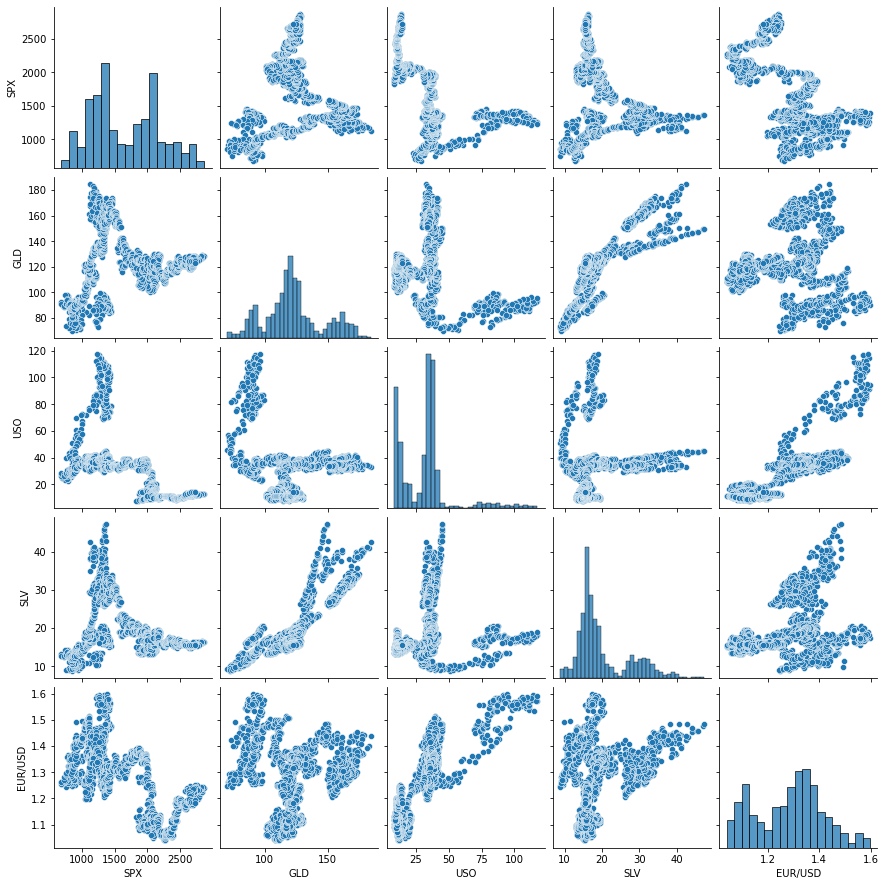

In [7]:
#plot the data to find correlation
sns.pairplot(data=gold)

<AxesSubplot:xlabel='Date'>

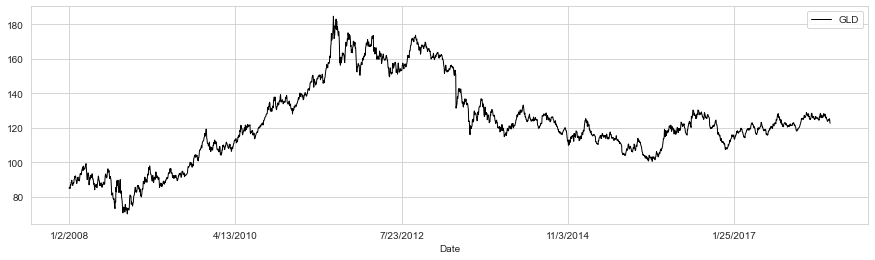

In [48]:
gold.plot.line(x='Date', y='GLD',figsize=(15,4),lw=1, color='black')


<AxesSubplot:xlabel='Date'>

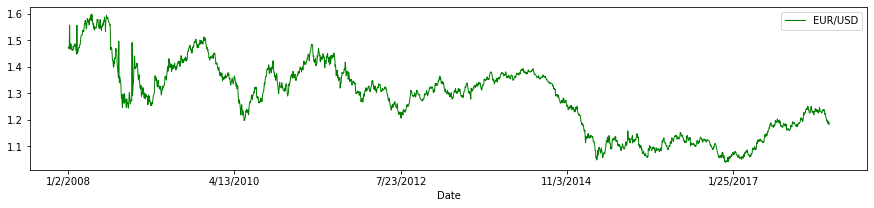

In [20]:
gold.plot.line(x='Date', y='EUR/USD',figsize=(15,3),lw=1, color='green')

In [28]:
#correlation
gold_corr = gold.corr()

<AxesSubplot:>

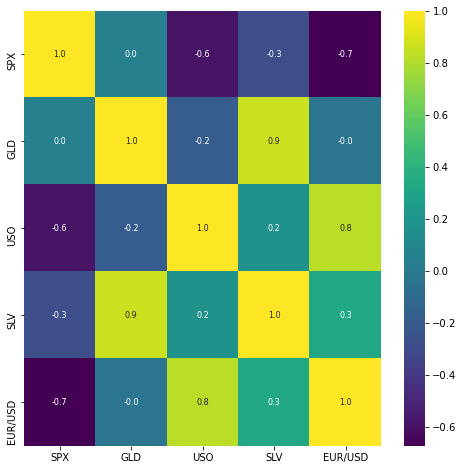

In [37]:
plt.figure(figsize=(8,8))
sns.heatmap(gold_corr,annot=True,fmt='.1f',cmap='viridis',annot_kws={'size':8})

In [38]:
gold_corr.GLD

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<AxesSubplot:xlabel='GLD', ylabel='Count'>

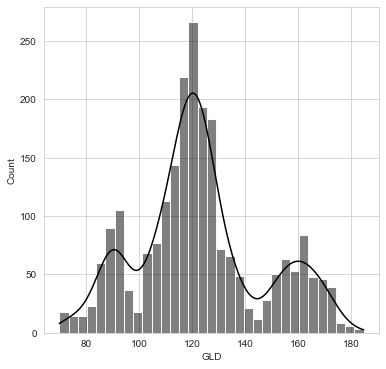

In [47]:
#check distribution of gold price
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
sns.histplot(data=gold,x='GLD',kde=True,color='black')

In [50]:
#split the data
X = gold.drop(['Date','GLD'],axis=1)
y = gold.GLD

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2
                                                ,random_state=2)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
reg = RandomForestRegressor()

In [57]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
x_test_pred = reg.predict(X_test)

In [59]:
from sklearn.metrics import r2_score

In [60]:
error = r2_score(y_test, x_test_pred)
print(error)

0.9893000517254555


Text(0, 0.5, 'error')

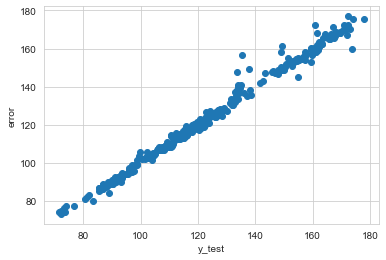

In [75]:
#plot the prediction
plt.scatter(y_test,x_test_pred)
plt.xlabel('y_test')
plt.ylabel('error')

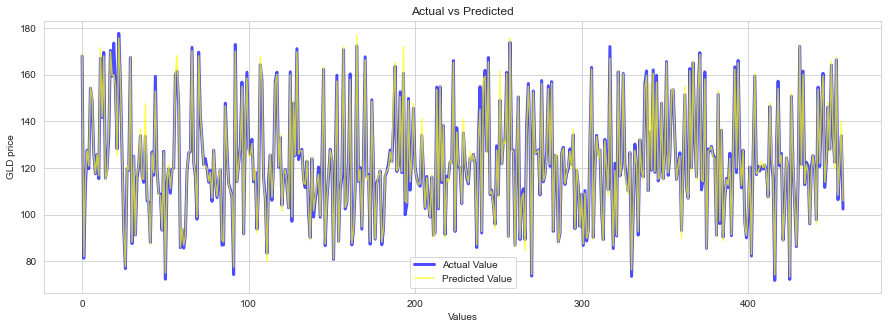

In [80]:
plt.figure(figsize=(15,5))
plt.plot(y_test,color='blue',label='Actual Value',alpha=0.7,lw=3)
plt.plot(x_test_pred,color='yellow',label='Predicted Value',alpha=0.7)
plt.title('Actual vs Predicted')
plt.xlabel('Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [86]:
#testing the model by predicting the value with new data 
input_data = (2639.399902,13.72,15.61,1.217167)

input_array = np.asarray(input_data)

reshape_array = input_array.reshape(1,-1)

prediction = reg.predict(reshape_array)
print(prediction)

[125.48270133]
